In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Estabilogramas en dirección medio-lateral (ML)
CoPx1oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ml_OC.csv", header= None)
CoPx2oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ml_OC.csv", header= None)
CoPx3oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ml_OC.csv", header= None)
# Estabilograma en direccion antero-posterior (AP)
CoPy1oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ap_OC.csv", header= None)
CoPy2oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ap_OC.csv", header= None)
CoPy3oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ap_OC.csv", header= None)
# Estabilogramas concatenados dirección (ML-AP)
CoPxy1oc = pd.concat([CoPx1oc,CoPy1oc],axis=1)
CoPxy2oc = pd.concat([CoPx2oc,CoPy2oc],axis=1)
CoPxy3oc = pd.concat([CoPx3oc,CoPy3oc],axis=1)

# Base de datos con informacion de los pacientes 
info = pd.read_excel("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/BDSinfo.xlsx")
info[info["Surface"] == "Firm"]
info = info.groupby("Subject").head(1).reset_index(drop=True)
info['Falls'] = info['Falls12m'].apply(lambda x: 0 if x == 0 else 1)
info = info[info["Age"]>=60]

# Filtrar la base de datos respecto a los pacientes
CoPx1oc=CoPx1oc[CoPx1oc.index.isin(info['Subject']+1)]
CoPx2oc=CoPx2oc[CoPx2oc.index.isin(info['Subject']+1)]
CoPx3oc=CoPx3oc[CoPx3oc.index.isin(info['Subject']+1)]
CoPy1oc=CoPy1oc[CoPy1oc.index.isin(info['Subject']+1)]
CoPy2oc=CoPy2oc[CoPy2oc.index.isin(info['Subject']+1)]
CoPy3oc=CoPy3oc[CoPy3oc.index.isin(info['Subject']+1)]
CoPxy1oc=CoPxy1oc[CoPxy1oc.index.isin(info['Subject']+1)]
CoPxy2oc=CoPxy2oc[CoPxy2oc.index.isin(info['Subject']+1)]
CoPxy3oc=CoPxy3oc[CoPxy3oc.index.isin(info['Subject']+1)]

#Agregar la etiqueta de salida a cada uno de los dataframe
CoPx1oc["Falls"]=info['Falls'].values
CoPx2oc["Falls"]=info['Falls'].values
CoPx3oc["Falls"]=info['Falls'].values
CoPy1oc["Falls"]=info['Falls'].values
CoPy2oc["Falls"]=info['Falls'].values
CoPy3oc["Falls"]=info['Falls'].values
CoPxy1oc["Falls"]=info['Falls'].values
CoPxy2oc["Falls"]=info['Falls'].values
CoPxy3oc["Falls"]=info['Falls'].values



In [7]:
CoPxyoc = pd.DataFrame()

# Filtrar los DataFrames según la columna "Falls" y restablecer los índices
CoPxy1oc_filtered = CoPxy1oc.reset_index(drop=True)
CoPxy2oc_filtered = CoPxy2oc[CoPxy2oc["Falls"] == 1].reset_index(drop=True)
CoPxy2oc_filtered.index = np.arange(CoPxy1oc_filtered.index[CoPxy1oc_filtered.shape[0]-1]+1,CoPxy1oc_filtered.index[CoPxy1oc_filtered.shape[0]-1]+CoPxy2oc_filtered.shape[0]+1,1)
CoPxy3oc_filtered = CoPxy3oc[CoPxy3oc["Falls"] == 1].reset_index(drop=True)
CoPxy3oc_filtered.index = np.arange(CoPxy2oc_filtered.index[CoPxy2oc_filtered.shape[0]-1]+1,CoPxy2oc_filtered.index[CoPxy2oc_filtered.shape[0]-1]+CoPxy3oc_filtered.shape[0]+1,1)

# Concatenar los DataFrames
CoPxyoc = pd.concat([CoPxy1oc_filtered, CoPxy2oc_filtered,CoPxy3oc_filtered])
CoPxyoc_data = pd.concat([CoPxy1oc_filtered, CoPxy2oc_filtered,CoPxy3oc_filtered])
# Verificar el resultado
CoPxyoc
CoPxyoc["Falls"].value_counts()

CoPxyoc_data=CoPxyoc_data.drop("Falls", axis=1)

In [42]:
Fourier = pd.DataFrame(0, index=range(CoPxyoc_data.shape[0]), columns=range(CoPxyoc_data.shape[1]//2), dtype=float)

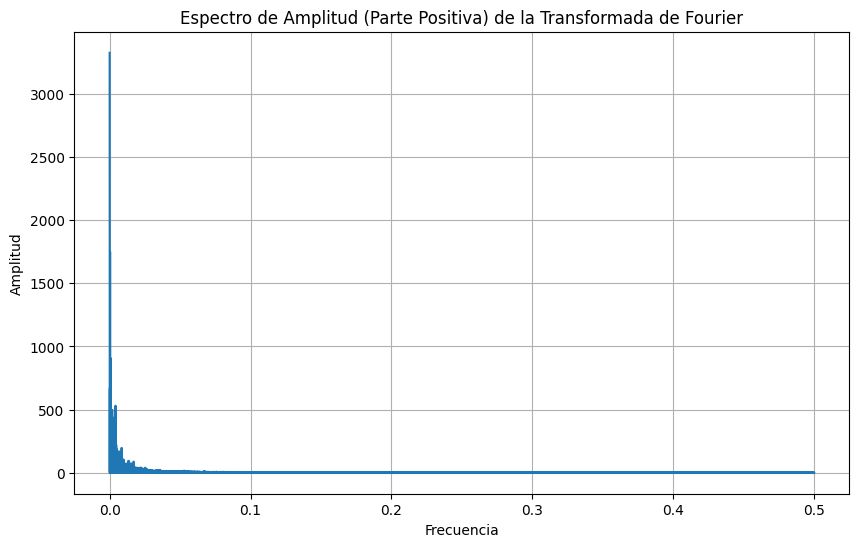

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,2469.187832,4148.745706,1027.847590,1944.056283,223.996305,1201.397513,336.054712,928.045465,70.299652,676.583034,...,0.240221,1.622475,0.240302,1.622451,0.240238,1.622473,0.240224,1.622424,0.240281,1.622452
1,8622.958711,3655.173181,2384.185260,8364.045923,7631.492152,1502.321489,2214.184167,1735.736497,1482.048445,1545.041203,...,0.887161,0.761276,0.887171,0.761267,0.887180,0.761216,0.887178,0.761254,0.887166,0.761235
2,4850.695789,2859.961922,1589.465516,411.853541,397.106603,52.731258,244.531615,226.058782,405.115276,608.864055,...,0.755744,0.264161,0.755724,0.264120,0.755747,0.264155,0.755740,0.264091,0.755727,0.264134
3,9870.762958,5522.604276,1126.246946,1273.179092,824.696317,369.369031,390.059032,103.046504,585.183119,848.974009,...,0.454133,0.462472,0.454135,0.462446,0.454100,0.462432,0.454123,0.462468,0.454139,0.462486
4,167.028394,2620.452004,400.571233,1126.306211,555.112840,585.078163,252.461293,306.277772,101.965962,284.292072,...,0.122191,0.951330,0.122217,0.951333,0.122241,0.951331,0.122204,0.951354,0.122199,0.951371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2338.667810,0.000000,1647.588059,0.000000,170.718218,0.000000,285.099001,0.000000,116.716615,0.000000,...,0.169690,0.000000,0.169683,0.000000,0.169676,0.000000,0.169627,0.000000,0.169653,0.000000
110,327.439096,0.000000,237.457550,0.000000,300.966006,0.000000,206.810342,0.000000,152.457033,0.000000,...,0.110109,0.000000,0.110160,0.000000,0.110155,0.000000,0.110136,0.000000,0.110155,0.000000
111,5806.538344,0.000000,593.663116,0.000000,1374.291893,0.000000,963.540380,0.000000,844.084674,0.000000,...,0.463749,0.000000,0.463800,0.000000,0.463739,0.000000,0.463687,0.000000,0.463743,0.000000
112,4670.132268,0.000000,2099.487222,0.000000,819.507194,0.000000,266.113896,0.000000,321.376629,0.000000,...,0.238095,0.000000,0.238092,0.000000,0.238059,0.000000,0.238107,0.000000,0.238049,0.000000


In [43]:
for i in range(CoPxyoc_data.shape[0]):
    # Extraer los datos numéricos del DataFrame
    datos = CoPxyoc_data.iloc[i,:].values

    # Calcular la transformada de Fourier de los datos
    transformada = np.fft.fft(datos)

    # Calcular las frecuencias correspondientes a los valores de la transformada
    n = len(datos)
    frecuencias = np.fft.fftfreq(n)

    # Seleccionar solo las frecuencias positivas
    frecuencias_positivas = frecuencias[:n//2]
    transformada_positiva = transformada[:n//2]
    
    Fourier.iloc[i,:] = np.abs(transformada_positiva)


# Plotear el espectro de amplitud solo para las frecuencias positivas
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_positivas, np.abs(transformada_positiva))
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud (Parte Positiva) de la Transformada de Fourier')
plt.grid()
plt.show()
Fourier

In [91]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix


# Supongamos que tienes dos clases en tu problema de clasificación
num_classes = 2
X = Fourier
y = CoPxyoc["Falls"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1000, validation_split=0.3)

# Predecir clases en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el Área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred[:, 1])

# Calcular el puntaje F1
f1 = f1_score(y_test, y_pred_classes)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)

Epoch 1/1000
2/2 [==============================] - 1s 167ms/step - loss: 1.2200 - accuracy: 0.6182 - val_loss: 4.9712 - val_accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 58ms/step - loss: 1.6950 - accuracy: 0.6545 - val_loss: 1.8970 - val_accuracy: 0.5833
Epoch 3/1000
2/2 [==============================] - 0s 59ms/step - loss: 1.2672 - accuracy: 0.5818 - val_loss: 1.8675 - val_accuracy: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.9770 - accuracy: 0.7818 - val_loss: 3.5635 - val_accuracy: 0.5417
Epoch 5/1000
2/2 [==============================] - 0s 81ms/step - loss: 0.8846 - accuracy: 0.7818 - val_loss: 1.9286 - val_accuracy: 0.5417
Epoch 6/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.4101 - accuracy: 0.8364 - val_loss: 1.9537 - val_accuracy: 0.4167
Epoch 7/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.7826 - accuracy: 0.8182 - val_loss: 1.1161 - val_accuracy: 0.5417
Epoch 8/1000

In [93]:
# Imprimir los resultados
print(f'Área bajo la curva ROC (AUC): {auc}')
print(f'Puntaje F1: {f1}')
print('Matriz de confusión:')
print(confusion)

Área bajo la curva ROC (AUC): 0.7450980392156863
Puntaje F1: 0.6451612903225806
Matriz de confusión:
[[14  3]
 [ 8 10]]


In [86]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes tus datos en X y las etiquetas en y
X = Fourier
y = CoPxyoc["Falls"]

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Supongamos que tienes dos clases en tu problema de clasificación
num_classes = 2

# Definir el número de pliegues (k)
k = 5

# Inicializar el objeto StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=23)

# Inicializar listas para almacenar los resultados
auc_scores = []
f1_scores = []

# Iterar sobre los pliegues
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear y compilar el modelo de la red neuronal (como se muestra en tu código anterior)
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train, epochs=100, validation_split=0.3)

    # Predecir clases en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calcular el Área bajo la curva ROC (AUC) y el puntaje F1 para este pliegue
    auc = roc_auc_score(y_test, y_pred[:, 1])
    f1 = f1_score(y_test, y_pred_classes)

    # Agregar los resultados a las listas
    auc_scores.append(auc)
    f1_scores.append(f1)

# Imprimir los resultados finales
print(f'Promedio AUC en {k}-fold cross-validation: {np.mean(auc_scores)}')
print(f'Promedio F1 en {k}-fold cross-validation: {np.mean(f1_scores)}')


Epoch 1/100
2/2 [==============================] - 1s 249ms/step - loss: 1.4816 - accuracy: 0.4762 - val_loss: 6.9272 - val_accuracy: 0.0714
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 1.5702 - accuracy: 0.7143 - val_loss: 4.5381 - val_accuracy: 0.0714
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 1.0169 - accuracy: 0.6667 - val_loss: 1.7652 - val_accuracy: 0.5714
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 2.5580 - accuracy: 0.6667 - val_loss: 6.0247 - val_accuracy: 0.0357
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 1.5708 - accuracy: 0.7619 - val_loss: 7.3464 - val_accuracy: 0.0357
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 0.5287 - accuracy: 0.8413 - val_loss: 5.8523 - val_accuracy: 0.4643
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 0.9503 - accuracy: 0.7937 - val_loss: 5.6975 - val_accuracy: 0.2500
Epoch 8/100
2/2 [==